In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

conn = sqlite3.connect("data/database.sqlite 2")
df = pd.read_sql_query("select * from reviews;", conn)
df_years = pd.read_sql_query("select * from years;", conn)
df_genres = pd.read_sql_query("select * from genres", conn)
df_reviews = pd.read_sql_query("select * from content", conn)

In [5]:
from wordcloud import WordCloud

In [41]:
adjectives_db = []
for i in range(len(df_reviews['content'])):
    adjectives = []
    blob = TextBlob(df_reviews['content'][i])
    for each in blob.pos_tags:
        if each[1] == u'JJ':
            adjectives.append(each[0])
    adjectives_db.append((df_reviews['reviewid'][i], " ".join(adjectives)))

In [42]:
df_adj_parse = pd.DataFrame(adjectives_db, columns =['reviewid', 'adjectives'])

In [43]:
df = df.merge(df_adj_parse)

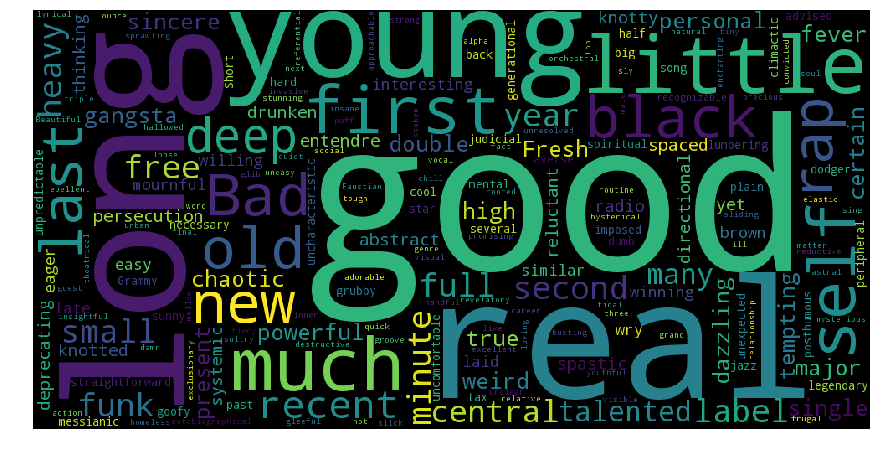

In [55]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df[df['artist'] == "kendrick lamar"]['adjectives']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()
pass

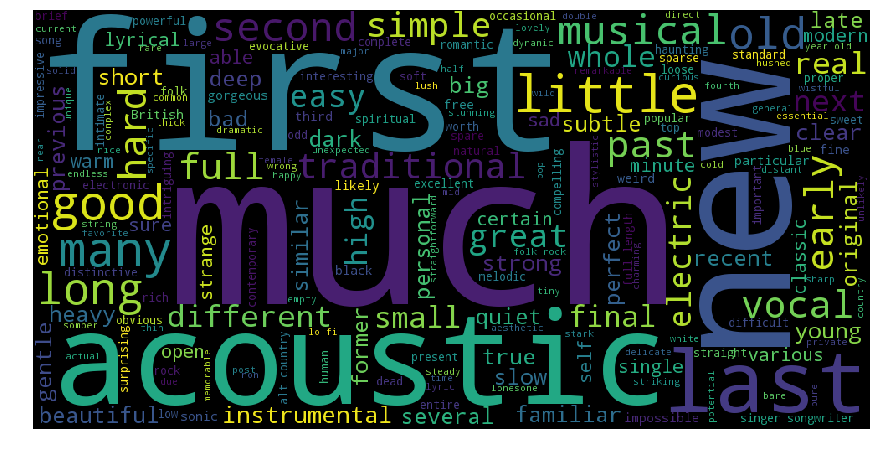

In [38]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df[df['genre'] == "folk/country"]['adjectives']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()
pass

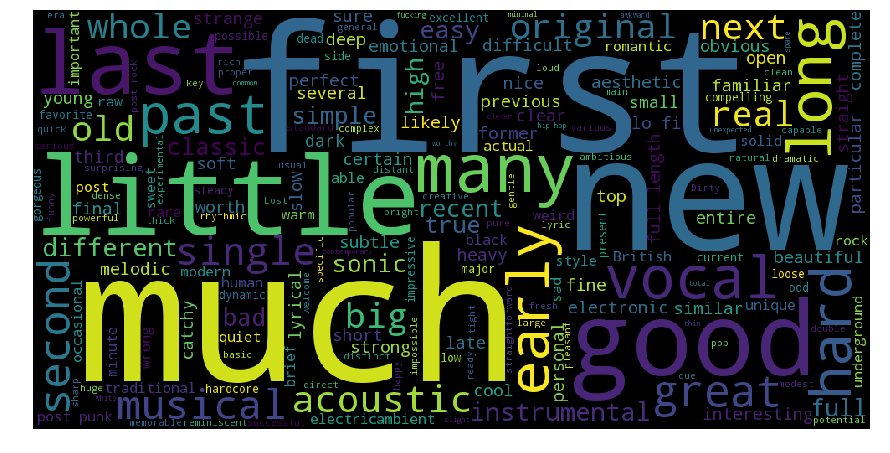

In [39]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df[df['genre'] == "rock"]['adjectives']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()
pass

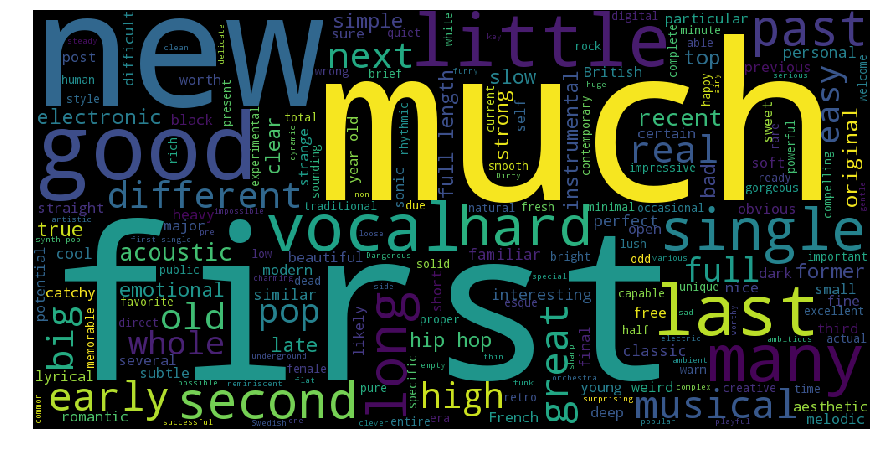

In [40]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df[df['genre'] == "pop/r&b"]['adjectives']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()
pass

In [8]:
df = df.merge(df_years).reset_index()
df = df.merge(df_genres).reset_index()
df.year.fillna(value=df.pub_year, inplace=True)
df.drop_duplicates('reviewid',inplace=True)
df.drop(['level_0', 'index'], axis=1, inplace=True)
df.year = df.year.astype(int)
df = df.merge(df_reviews)

In [16]:
df['genre'].unique()

array([u'electronic', u'metal', u'rock', None, u'rap', u'experimental',
       u'folk/country', u'jazz', u'pop/r&b', u'global'], dtype=object)

In [114]:
TextBlob(df_reviews['content'][1000], analyzer=NaiveBayesAnalyzer()).

Sentiment(classification='pos', p_pos=1.0, p_neg=3.876155213920638e-20)

In [25]:
blob = TextBlob(df_reviews['content'][400])

In [28]:
adjectives = []
for each in blob.pos_tags:
    if each[1] == u'JJ':
        adjectives.append(each[0])

In [29]:
adjectives

[u'past',
 u'out\xa0low-end\u2014a\xa0traditional',
 u'hip-hop',
 u'conceptual',
 u'previous',
 u'full-length',
 u'recent',
 u'experimental',
 u'runaway',
 u'musical',
 u'full-length',
 u'hip-hop',
 u'sole',
 u'interstellar',
 u'high-concept',
 u'rare',
 u'equal',
 u'prog-rock',
 u'P-funk.Certainly',
 u'difficult',
 u'raw',
 u'static',
 u'impressive',
 u'clinical',
 u'tongue-twisting',
 u'straight',
 u'His\xa0rapid-fire',
 u'own',
 u'independent',
 u'in\xa0third-person',
 u'clear',
 u'vocal',
 u'familiar',
 u'black',
 u'playful',
 u'zero-gravity',
 u'tightly-wound',
 u'slack',
 u'much',
 u'admirable',
 u'other',
 u'identifiable',
 u'spoken-word',
 u'possible',
 u'compelling',
 u'hip-hop',
 u'previous',
 u'well-placed',
 u'conceptual',
 u'abstract',
 u'hip-hop',
 u'musical']

In [113]:
sentiments = []
polarity = []
for each in range(len(df['reviewid'])):
    sentiments.append((df_reviews['reviewid'].iloc[each], TextBlob(df_reviews['content'][each]).sentiment[1],
                     TextBlob(df_reviews['content'][each]).sentiment[0], TextBlob(df_reviews['content'][each], analyzer=NaiveBayesAnalyzer()).sentiment[0],
                     TextBlob(df_reviews['content'][each], analyzer=NaiveBayesAnalyzer()).sentiment[1],
                     TextBlob(df_reviews['content'][each], analyzer=NaiveBayesAnalyzer()).sentiment[2]))    

KeyboardInterrupt: 

In [109]:
df_sent = pd.DataFrame(sentiments, columns=['reviewid', 'subjectivity', 'polarity', 'classification', 'p_pos', 'p_neg'])

AssertionError: 6 columns passed, passed data had 3 columns

In [118]:
df = df.merge(df_sent)

In [119]:
df.sort_values('polarity', ascending=False)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,subjectivity,polarity
18356,2265,peloton,the delgados,http://pitchfork.com/reviews/albums/2265-peloton/,8.9,0,sarah zupko,None,1999-04-06,1,6,4,1999,0.545912,0.360155
7543,14503,tiger flower circle sun,christopher willits,http://pitchfork.com/reviews/albums/14503-tige...,6.9,0,tal rosenberg,contributor,2010-08-06,4,6,8,2010,0.571991,0.357870
15610,1076,the omaha record,bottom of the hudson,http://pitchfork.com/reviews/albums/1076-the-o...,7.0,0,william bowers,contributor,2003-09-30,1,30,9,2003,0.444444,0.354167
14044,2067,a house full of friends,various artists,http://pitchfork.com/reviews/albums/2067-a-hou...,7.1,0,marc hogan,senior staff writer,2005-03-14,0,14,3,2005,0.502381,0.350577
17696,7565,a celebratory arm gesture,summer hymns,http://pitchfork.com/reviews/albums/7565-a-cel...,8.8,0,matt lemay,contributor,2001-06-18,0,18,6,2001,0.612318,0.347085
10242,11452,the best of joy division,joy division,http://pitchfork.com/reviews/albums/11452-the-...,6.0,0,marc masters,contributor,2008-04-30,2,30,4,2008,0.459973,0.343328
14665,4458,muswell hillbillies,the kinks,http://pitchfork.com/reviews/albums/4458-muswe...,8.9,0,jason josephes,contributor,2004-08-24,1,24,8,2004,0.495532,0.317345
11019,10582,city morning song,sarah shannon,http://pitchfork.com/reviews/albums/10582-city...,7.2,0,david raposa,None,2007-09-06,3,6,9,2007,0.484179,0.316335
14117,3334,has a good home,final fantasy,http://pitchfork.com/reviews/albums/3334-has-a...,6.6,0,nitsuh abebe,contributor,2005-02-21,0,21,2,2005,0.595782,0.313657
18287,3224,love is real ep,edith frost,http://pitchfork.com/reviews/albums/3224-love-...,7.7,0,ryan schreiber,editor-in-chief,1999-07-13,1,13,7,1999,0.569877,0.313443


In [120]:
df_subj_byyear = df[df['score'] > 8].groupby('pub_year').mean().reset_index()
df_subj_byyear

,pub_year,reviewid,score,best_new_music,pub_weekday,pub_day,pub_month,subjectivity,polarity
0,1999,4693.807018,8.721053,0.000000,1.368421,16.543860,6.070175,0.496134,0.138941
1,2000,4657.718310,8.649296,0.000000,1.647887,18.535211,6.267606,0.499345,0.104843
2,2001,5170.852459,8.677869,0.000000,2.098361,17.754098,8.057377,0.493938,0.126801
3,2002,4379.396739,8.605978,0.000000,2.211957,14.788043,5.880435,0.495729,0.121573
4,2003,4727.454167,8.533333,0.187500,2.262500,15.216667,6.300000,0.498318,0.114732
5,2004,4938.600858,8.568670,0.184549,2.150215,15.171674,6.283262,0.490729,0.122056
6,2005,4723.014778,8.592118,0.192118,2.256158,15.246305,6.157635,0.488605,0.121588
7,2006,7858.371728,8.516230,0.162304,2.057592,15.366492,6.544503,0.490974,0.135348
8,2007,10383.145833,8.547917,0.223958,2.114583,15.697917,5.916667,0.486204,0.125954
9,2008,11708.615385,8.549451,0.197802,1.961538,15.873626,6.208791,0.485335,0.137519


In [121]:
years = df_subj_byyear['pub_year'].values

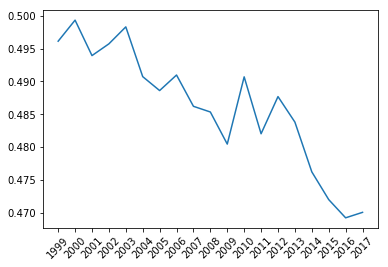

In [122]:
plt.plot(df_subj_byyear['pub_year'], df_subj_byyear['subjectivity'])
plt.xticks(years, rotation=45)
plt.show()

In [137]:
from scipy.stats import ttest_ind

sub2015 = df[df['pub_year'] == 2015]['subjectivity']
sub2016 = df[df['pub_year'] == 2016]['subjectivity']

t, p = ttest_ind(sub2015, sub2016, equal_var=False)

p

0.4840278821782481

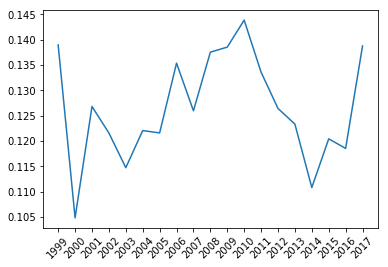

In [128]:
plt.plot(df_subj_byyear['pub_year'], df_subj_byyear['polarity'])
plt.xticks(years, rotation=45)
plt.show()

In [123]:
testimonial = TextBlob(df_reviews['content'][1000])
sent = testimonial.sentiment

In [124]:
TextBlob(df_reviews['content'][1000]).sentiment

Sentiment(polarity=0.14763095238095236, subjectivity=0.5278095238095237)

In [125]:
sentiments[1]

(22721,
 0.40645743145743146,
 0.04163961038961039,
 'pos',
 0.9999999999861309,
 1.3892711896181222e-11)

In [115]:
def plot_violins(df, genre=all):
    years = list(df.pub_year.unique())
    score_dist = {1999: [],}
    for score,year in zip(df.subjectivity.astype(list), df.pub_year.astype(list)):
        if year not in score_dist.keys():
            score_dist[year] = []
        else:
            score_dist[year] = score_dist[year] + [score]

    plt.figure(figsize=(30,14))
    for each in years:
        plt.xticks(years, fontsize=16)
#         plt.yticks(range(0,1))
        if each == 2017:
            continue
        plt.violinplot(np.array(score_dist[each]), [each], widths=1,showmedians=True,showextrema=True)
    plt.title('Subjectivity Distribution by Year ({})'.format(genre), fontsize=24)
    plt.ylabel('Score', fontsize=16)
    plt.xlabel('Year', fontsize=16)

In [116]:
import numpy as np

In [117]:
plot_violins(df)

AttributeError: 'DataFrame' object has no attribute 'subjectivity'